In [44]:
import csv
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import sklearn.tree as tree
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler, normalize


In [45]:
data = pd.read_csv('Epileptic_Seizure_Recognition_data.csv')

In [46]:
# data.info()

In [47]:
X = data[data.columns.difference(['y'])]
y = data.y

In [48]:
features = list(X_train.columns.values)

In [49]:
# data.head()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

## Decision trees

In [51]:
## Tuning hyperparameter
# clf = DecisionTreeClassifier()
# param_dist = {"max_depth": randint(3,8),
#               "min_samples_leaf": randint(1, 5),
#               "min_samples_split": randint(2, 5)}

# kfold = KFold(n_splits = 5, random_state = None)
# random_search = RandomizedSearchCV(clf, param_distributions=param_dist,scoring = 'accuracy',
#                                    n_iter=25, cv=kfold,verbose = 5)
# random_search.fit(X, y)
# print(random_search.best_params_)

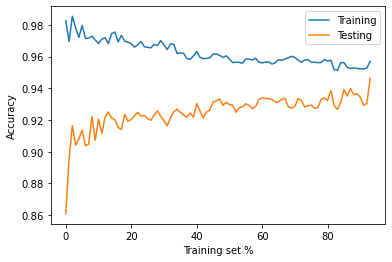

In [52]:
list1=[]
list2=[]
for i in range(1,95):
    clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf = 4, min_samples_split= 2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list1)),list1,label="Training")
plt.plot(range(len(list2)),list2,label="Testing")
plt.xlabel("Training set %")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

## Neural networks

In [53]:
# ##
# clf = MLPClassifier()
# kfold = KFold(n_splits = 5, random_state = None)
# param_dist = {"solver" : ['lbfgs', 'sgd', 'adam'],
#               "activation" : ['identity', 'logistic', 'tanh', 'relu'],
#               "alpha": [0.0001, 0.05],
#               "hidden_layer_sizes": [(100,50),(50,10),(30,5), (5,2),(5,),(3,),(2,)],
#               'learning_rate': ['constant','adaptive']
#               }
# random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
#                                    n_iter=25, cv=kfold,verbose = 10)
# random_search.fit(X, y)
# print(random_search.best_params_)

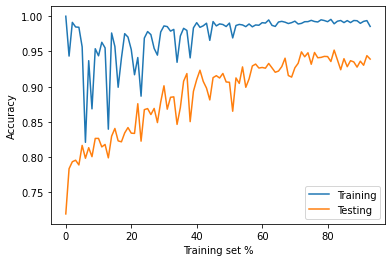

In [54]:
list1=[]
list2=[]
for i in range(1,95):
    clf = MLPClassifier(solver= 'sgd', 
                              learning_rate =  'constant', 
                              hidden_layer_sizes = (50, 10),
                              alpha = 0.0001,
                              activation = 'relu'
                       )
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list1)),list1,label="Training")
plt.plot(range(len(list2)),list2,label="Testing")
plt.xlabel("Training set %")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

## Boosting

In [55]:
# ## 
# clf = AdaBoostClassifier()
# param_dist = {"n_estimators" : randint(50, 150),
#               "learning_rate" : [0.1,0.5,1,5], 
#               }
# kfold = KFold(n_splits = 5, random_state = None)
# random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
#                                    n_iter=25,cv=kfold,scoring = 'accuracy',verbose = 10)
# random_search.fit(X, y)
# print("Best hyperparameters are: ")
# print(random_search.best_params_)


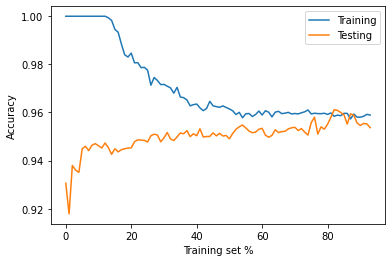

In [56]:
list1=[]
list2=[]
for i in range(1,95):
    clf = AdaBoostClassifier(n_estimators=148, learning_rate = 0.5)    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list1)),list1,label="Training")
plt.plot(range(len(list2)),list2,label="Testing")
plt.xlabel("Training set %")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

## Support Vector Machines

In [57]:
# Xn = normalize(X)
# clf = svm.SVC()
# SVCparams = [{'kernel': ['rbf'],'C': [0.1, 0.5, 1, 5, 10]}
#              ,{'kernel': ['linear'], 'C': [0.1, 0.5, 1, 5, 10]}
#              ,{'kernel': ['polynomial'], 'C': [0.1, 0.5, 1, 5, 10]}
#             ]
# random_search = RandomizedSearchCV(clf, SVCparams, n_jobs = 25, n_iter=25,cv=kfold,scoring = 'accuracy',verbose = 10)
# random_search.fit(Xn, y)
# print("Best params: ", SVCgs.best_params_)


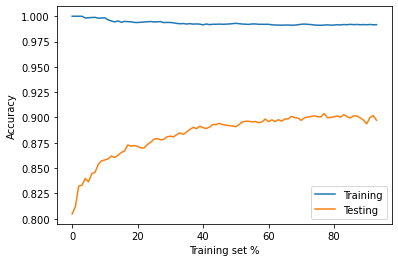

In [58]:
# SVM learning curve with RBF kernel
list1=[]
list2=[]
for i in range(1,95):
    clf = svm.SVC(kernel="rbf", C=5)
    X_train, X_test, y_train, y_test = train_test_split(Xn, y, random_state=100, test_size=1-i/100)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list1)),list1,label="Training")
plt.plot(range(len(list2)),list2,label="Testing")
plt.xlabel("Training set %")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

## KNN

In [59]:
# neighbors = list(range(1, 50, 2))
# cv_scores = []
# for k in neighbors:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
#     cv_scores.append(scores.mean())
# # changing to misclassification error
# mse = [1 - x for x in cv_scores]

# # determining best k
# optimal_k = neighbors[mse.index(min(mse))]
# print("The optimal number of neighbors is {}".format(optimal_k))

# # plot misclassification error vs k
# plt.plot(neighbors, mse)
# plt.xlabel("Number of Neighbors K")
# plt.ylabel("Misclassification Error")
# plt.show()

In [61]:
list1=[]
list2=[]
for i in range(1,95):
    clf = KNeighborsClassifier(3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list1)),list1,label="Training")
plt.plot(range(len(list2)),list2,label="Testing")
plt.xlabel("Training set %")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()